In [1]:
import pandas as pd
import math

In [2]:
df = pd.read_csv('dataset_id3.csv')

In [3]:
df

,outlook,temperature,humidity,wind,playtennis
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [4]:
m=df.shape[0]
n=df.shape[1]

In [5]:
class node:
    def __init__(self):
        self.leaf = False
        self.label = 'x'
        self.next = []
        self.decision_attribute = 'x'

In [6]:
def getEntropy(l):
    if 0 in l:
        return 0
    p = l[0] / sum(l)
    return -1 * (p * math.log2(p)+(1-p) * math.log2(1-p))

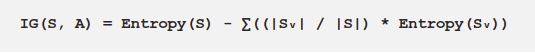

In [7]:
def getHighestGain(df, m, n):
    mp = []
    entropy = 0
    f = False
    for i in range(n):
        yes, no = 0, 0
        my_dict = dict()
        for j in range(m):
            if df.iloc[j][i] in my_dict:
                pass
            else:
                my_dict[df.iloc[j][i]]=[0, 0]
            if df.iloc[j][-1] == 'yes':
                yes += 1
                my_dict[df.iloc[j][i]][0] += 1
            else:
                no += 1
                my_dict[df.iloc[j][i]][1] += 1
        mp.append(my_dict)
        if not f:
            f = True
            entropy = getEntropy([yes, no])
    max_info_gain, max_info_gain_idx = -1, -1
    for v, i in enumerate(mp):
        info_gain = entropy
        for j in i:
            info_gain = info_gain - (sum(i[j]) / m) * getEntropy(i[j])
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            max_info_gain_idx = v
    return max_info_gain_idx

In [8]:
map = {}
for i in df.columns:
    s = set()
    for j in range(m):
        s.add(df.iloc[j][i])
    map[i] = s

In [9]:
def id3(df):
    Node = node()
    m, n = df.shape[0], df.shape[1]
    if df.iloc[:,-1].nunique() == 1:
        Node.label = '+' if df.iloc[0][-1] == 'yes' else '-'
        Node.leaf = True
        return Node
    if n == 1:
        Node.leaf = True
        Node.label = '+' if df.iloc[:,-1].value_counts()[:1].index.tolist()[0] == 'yes' else '-'
        return Node
    a = getHighestGain(df, m, n-1)
    A = df.columns.values.tolist()[a]
    Node.decision_attribute = A
    for i in map[A]:
        x = df.index[df[A] == i].values.tolist()
        if x == []:
            new_df = df.copy()
            for j in range(n-1):
                new_df.drop(columns = new_df.columns[j], inplace = True)
            Node.next.append(id3(new_df))
        else:
            new_df = df.copy()
            new_df.drop(new_df.index[new_df[A] != i], inplace = True)
            new_df.drop(columns = A, inplace=True)
            Node.next.append((id3(new_df), i))
    return Node

In [10]:
def test(root:node,instance:dict):
    if root.leaf:
        return root.label
    decision_attribute = instance[root.decision_attribute]
    for i in root.next:
        if i[1] == decision_attribute:
            return test(i[0], instance)
    return '-1'

In [11]:
def val(root:node, df: pd.DataFrame)->dict:
    m = df.shape[0]
    mismatch = 0
    for i in range(m):
        instance = {}
        for j in df.columns:
            instance[j] = df.loc[i,j]
        res = test(root,instance)
        if (df.iloc[i][-1] == 'yes' and res == '-') or (df.iloc[i][-1] == 'no' and res == '+'):
            mismatch += 1
    return {'incorrect_clasifications': mismatch, 'correct_classifications': (m-mismatch), 'instances_tested': m}

In [12]:
def print_tree(root:node):
    print([root.decision_attribute,root.leaf,root.label, [b[1] for b in root.next]])
    for i in root.next:
        print_tree(i[0])

In [13]:
root = id3(df)

In [14]:
print_tree(root)

['outlook', False, 'x', ['rain', 'sunny', 'overcast']]
['wind', False, 'x', ['strong', 'weak']]
['x', True, '-', []]
['x', True, '+', []]
['humidity', False, 'x', ['normal', 'high']]
['x', True, '+', []]
['x', True, '-', []]
['x', True, '+', []]


In [15]:
val(root,df)

{'incorrect_clasifications': 0,
 'correct_classifications': 14,
 'instances_tested': 14}